**REALISED BY**: **MOULOUDI YAHYA** AND **LOKMANE AIT EL MAATI** 


**Introduction**

**Problem Statement:**
In this project, sentiment analysis was done using natural language processing on the online reviews prevalant for HOTELS
which were lablelled. Using the spacy package of python to preprocess the data before, each individual review has been
tokenized, lemmatized, filtered for stop words and vectorized inorder to prepare the data viable for the machine learning 
model. A pipeline was created which vectorized the preprocessed data using count vectorization or tfidf vectorizer, 
which is then split into training and testing datasets and were then used to train the machine learning model and evaluate.

**Spacy for NLP**

**Spacy** is written in cython language, (C extension of Python designed to give C like performance to the python program). Hence is a quite fast library. spaCy provides a concise API to access its methods and properties governed by trained machine (and deep) learning models.

Implementation of spacy and access to different properties is initiated by creating pipelines. A pipeline is created by loading the models. There are different type of models provided in the package which contains the information about language – vocabularies, trained vectors, syntaxes and entities.

These pipelines outputs a wide range of document properties such as – tokens, token’s reference index, part of speech tags, entities, vectors, sentiment, vocabulary etc. Let’s explore some of these properties.

**Tokenization:** Every spaCy document is tokenized into sentences and further into tokens which can be accessed by iterating the document.

**Part of Speech Tagging:** Part-of-speech tags are the properties of the word that are defined by the usage of the word in the grammatically correct sentence. These tags can be used as the text features in information filtering, statistical models, and rule based parsing.

**Entity Detection** Spacy consists of a fast entity recognition model which is capable of identifying entitiy phrases from the document. Entities can be of different types, such as – person, location, organization, dates, numerals, etc. These entities can be accessed through “.ents” property.

**Dependency Parsing** One of the most powerful feature of spacy is the extremely fast and accurate syntactic dependency parser which can be accessed via lightweight API. The parser can also be used for sentence boundary detection and phrase chunking. The relations can be accessed by the properties “.children” , “.root”, “.ancestor” etc.

**Noun Phrases** Dependency trees can also be used to generate noun phrases

**Word to Vectors Integration** Spacy also provides inbuilt integration of dense, real valued vectors representing distributional similarity information. It uses GloVe vectors to generate vectors. GloVe is an unsupervised learning algorithm for obtaining vector representations for words.

**Dataset** 

The data set contains about 10000 online reviews of the HOTELS 

In [4]:
!pip install scikit-learn
!pip install wordcloud

In [2]:
!pip install -U spacy

Requirement already up-to-date: spacy in c:\users\yahya\anaconda3\lib\site-packages (2.3.2)


Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)")': /simple/spacy/


In [3]:
!python -m spacy download en

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\yahya\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\yahya\Anaconda3\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


Vous ne disposez pas de privilŠges suffisants pour effectuer cette op‚ration.


In [ ]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [5]:
#spacy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython.
#The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion.
import spacy
from spacy import displacy

In [10]:
nlp = spacy.load('en_core_web_sm')
text = "Sentiment analysis refers to the use of natural language processing. text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment analysis is widely applied to voice of the customer materials such as reviews and survey responses, online and social media, and healthcare materials for applications that range from marketing to customer service to clinical medicine."
doc = nlp(text)
doc

Sentiment analysis refers to the use of natural language processing. text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment analysis is widely applied to voice of the customer materials such as reviews and survey responses, online and social media, and healthcare materials for applications that range from marketing to customer service to clinical medicine.

In [11]:
#tokenization 
for token in doc:
    print(token)

Sentiment
analysis
refers
to
the
use
of
natural
language
processing
.
text
analysis
,
computational
linguistics
,
and
biometrics
to
systematically
identify
,
extract
,
quantify
,
and
study
affective
states
and
subjective
information
.
Sentiment
analysis
is
widely
applied
to
voice
of
the
customer
materials
such
as
reviews
and
survey
responses
,
online
and
social
media
,
and
healthcare
materials
for
applications
that
range
from
marketing
to
customer
service
to
clinical
medicine
.


In [12]:
#extract the sentences, it will consider a sentence, it is the one that ends with a point.
sent = nlp.create_pipe('sentencizer')
nlp.add_pipe(sent, before='parser')

In [13]:
doc = nlp(text)

In [14]:
for sent in doc.sents:
    print(sent)

Sentiment analysis refers to the use of natural language processing.
text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information.
Sentiment analysis is widely applied to voice of the customer materials such as reviews and survey responses, online and social media, and healthcare materials for applications that range from marketing to customer service to clinical medicine.


In [15]:
from spacy.lang.en.stop_words import STOP_WORDS

In [16]:
stopwords = list(STOP_WORDS)

In [17]:
print(stopwords)

['is', 'neither', 'we', 'whatever', 'yours', 'n’t', 'every', 'because', 'should', 'such', '’ll', 'twelve', 'here', 'seem', 'any', 'amongst', 'herein', 'onto', 'besides', 'there', 'ca', 'her', 'see', 'next', 'until', 'amount', 'i', "'ll", 'be', 'therefore', 'done', 'anyone', 'put', 'keep', 'various', 'afterwards', 'my', "'m", 'almost', 'a', 'but', 'our', 'less', 'eight', 'though', 'formerly', 'anyhow', 'after', 'please', 'ourselves', 'may', 'top', 'made', 'too', 'how', 'same', 'which', 'your', 'former', 'everything', 'behind', 'for', 'than', 'becomes', 'once', 'back', 'must', 'really', 'around', 'thence', 'upon', 'so', 'this', 'whom', 'thru', 'except', 'me', 'without', 'whence', 'down', 'nowhere', 'side', 'does', 'through', 'seeming', 'thus', 'hereafter', 'otherwise', '‘ll', 'six', 'used', 'two', 'becoming', 'was', 'nine', 'often', 'that', 'during', 'none', 'while', 'some', 'first', 'whose', 'nothing', 'seemed', 'towards', 'another', 'somehow', 'do', 'against', "'d", 'few', 'further', '

In [18]:
len(stopwords)

326

In [19]:
for token in doc:
    if token.is_stop == False:
        print(token)

Sentiment
analysis
refers
use
natural
language
processing
.
text
analysis
,
computational
linguistics
,
biometrics
systematically
identify
,
extract
,
quantify
,
study
affective
states
subjective
information
.
Sentiment
analysis
widely
applied
voice
customer
materials
reviews
survey
responses
,
online
social
media
,
healthcare
materials
applications
range
marketing
customer
service
clinical
medicine
.


### Lemmatization 

In [23]:
doc = nlp('got runs sleepless going happy happinesse gave feeling went held lost made said ')

In [24]:
for lem in doc:
    print(lem.text, lem.lemma_)

got get
runs run
sleepless sleepless
going go
happy happy
happinesse happinesse
gave give
feeling feeling
went go
held hold
lost lose
made make
said say


### POS 

In [25]:
doc = nlp('Sentiment analysis use natural language processing.')


In [26]:
for token in doc :
    print(token.text, token.pos_)

Sentiment NOUN
analysis NOUN
use VERB
natural ADJ
language NOUN
processing NOUN
. PUNCT


In [27]:
displacy.render(doc, style = 'dep')

### Entity Detection 

In [28]:
doc = nlp("New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against dangerous diseases. At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday. The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, to receive inoculations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000.")

In [29]:
doc

New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against dangerous diseases. At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday. The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, to receive inoculations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000.

In [30]:
displacy.render(doc, style = 'ent')

### Text Classification 

In [31]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
data = pd.read_csv('C:\\Users\hotel_data.txt', sep='\t', header = None, encoding="UTF-16")
#

In [34]:
data.head()

,0,1
0,I am so angry that i made this post available...,1
1,The rooms provided were small We had to upgra...,1
2,the bed is not comfortable the breakfast is a...,1
3,Room was OK if a little small and this was a ...,0
4,Location and staff very friendly,0


In [35]:
columns_name = ['Review', 'Sentiment']
data.columns = columns_name

In [36]:
data.head()

,Review,Sentiment
0,I am so angry that i made this post available...,1
1,The rooms provided were small We had to upgra...,1
2,the bed is not comfortable the breakfast is a...,1
3,Room was OK if a little small and this was a ...,0
4,Location and staff very friendly,0


In [37]:
data.shape

(10000, 2)

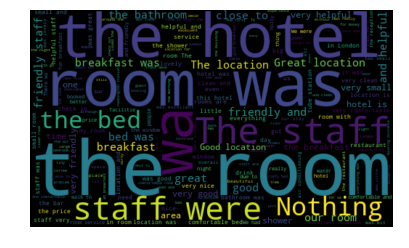

In [38]:
allWords= ' '.join([ rvw for rvw in data["Review"]])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
def getAnalysis(score):
  if score==0:
    return 'Bad'
  elif score==1:
    return 'Good'
  

data['Analysis'] = data['Sentiment'].apply(getAnalysis)
data

,Review,Sentiment,Analysis
0,I am so angry that i made this post available...,1,Good
1,The rooms provided were small We had to upgra...,1,Good
2,the bed is not comfortable the breakfast is a...,1,Good
3,Room was OK if a little small and this was a ...,0,Bad
4,Location and staff very friendly,0,Bad
5,great value for a posh hotel staff were very ...,0,Bad
6,Location for train and the help from the conc...,0,Bad
7,The room itself was clean and of a good size ...,1,Good
8,Bathroom very small,1,Good
9,Could have done with a hook next to the showe...,1,Good


In [40]:
data['Sentiment'].value_counts()

1    5000
0    5000
Name: Sentiment, dtype: int64

In [41]:
data.isnull().sum()

Review       0
Sentiment    0
Analysis     0
dtype: int64

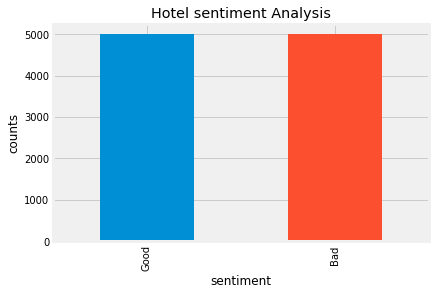

In [42]:
data['Analysis'].value_counts()

plt.title('Hotel sentiment Analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
data['Analysis'].value_counts().plot(kind='bar')
plt.show() 

### Tokenization 

In [43]:
import string

In [44]:
punct = string.punctuation

In [45]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [47]:
text_data_cleaning("Sentiment analysis (also known as opinion mining or emotion AI) refers to the use of natural language processing.")

['sentiment',
 'analysis',
 'know',
 'opinion',
 'mining',
 'emotion',
 'ai',
 'refer',
 'use',
 'natural',
 'language',
 'processing']

### Vectorization Feature Engineering (TF-IDF) 

In [48]:
from sklearn.svm import LinearSVC

In [49]:
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = LinearSVC()

In [50]:
X = data['Review']
y = data['Sentiment']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
X_train.shape, X_test.shape

((8000,), (2000,))

In [53]:
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [54]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [55]:
y_pred = clf.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1001
           1       0.91      0.92      0.91       999

   micro avg       0.91      0.91      0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [57]:
"Good" if clf.predict(['Worst hotel ive stayed in'])[0] == 0 else "Bad" 

'Bad'

In [58]:
"Good" if clf.predict(['Clean, good location, great breakfast and amazing staff!'])[0] == 0 else "Bad" 

'Good'

In [60]:
"Good" if clf.predict(['But everything else about he place was pretty great. Very clean, sleek interior. Cool location'])[0] == 0 else "Bad" 

'Good'

In [61]:
"Good" if clf.predict(['the room is ugly'])[0] == 0 else "Bad" 

'Bad'